# Project Part 2

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/cbarond/cs39aa_project/blob/main/project_part2.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cbarond/cs39aa_project/blob/main/project_part2.ipynb)


# Setup

To start, I separated the three datasets (training, validation, and test) into their text and label parts. After that, I tokenized the text of each dataset, based on the training data.

In [3]:
# import all of the python modules/packages you'll need here
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("emotion")

Found cached dataset emotion (/home/caelan/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [30]:
dataset.set_format(type='pandas', columns=['text','label'])

X_train_raw = dataset['train']['text'].copy()
Y_train = dataset['train']['label'].copy()
X_valid_raw = dataset['validation']['text'].copy()
Y_valid = dataset['validation']['label'].copy()
X_test_raw = dataset['test']['text'].copy()
Y_test = dataset['test']['label'].copy()

pandas.core.series.Series

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenize training data
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()

print(f"X_train.shape = {X_train.shape}")
type(X_train)

# Tokenize validation data
X_valid = tfidf_vectorizer.transform(X_valid_raw).toarray()
print(f"X_val.shape = {X_valid.shape}")
type(X_valid)

# Tokenize test data
X_test = tfidf_vectorizer.transform(X_test_raw).toarray()
print(f"X_test.shape = {X_test.shape}")
type(X_test)

X_train.shape = (16000, 15186)
X_val.shape = (2000, 15186)
X_test.shape = (2000, 15186)


numpy.ndarray

# Training the Model

I first trained the model with a Random Forest Classifier and no hyperparameter tuning. This preliminary model had 99.8% accuracy on the training data.

accuracy (on X_train): 0.9981


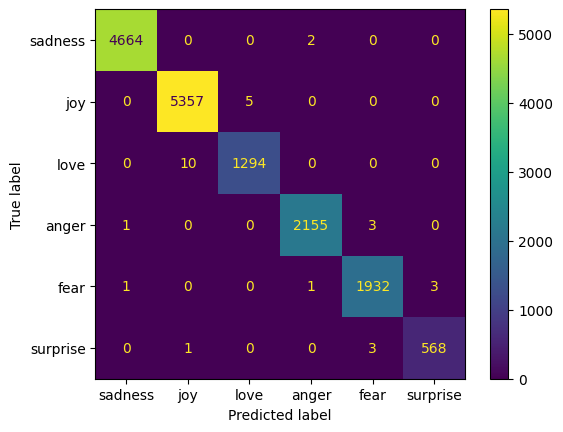

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

model = RandomForestClassifier(n_jobs=-1) # n_jobs=-1 will use all available cores
model = model.fit(X_train, Y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(Y_train, predictions_train), display_labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(Y_train, predictions_train):.4f}")

## Validation data

I used the previously trained model to predict the labels in the validation data. This prediction had an accuracy of 87.4%.

accuracy (on X_train): 0.8740


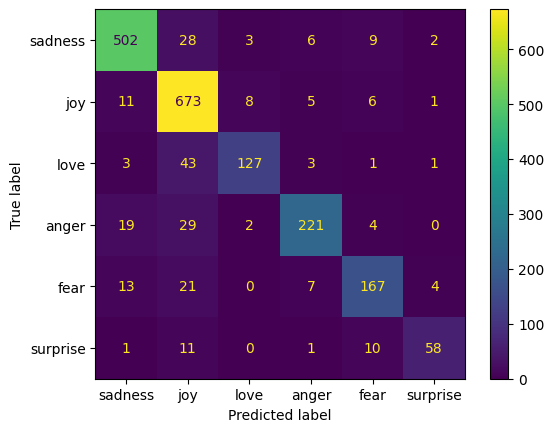

In [20]:
predictions_val = model.predict(X_valid)
disp = ConfusionMatrixDisplay(confusion_matrix(Y_valid, predictions_val), display_labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(Y_valid, predictions_val):.4f}")

# Hyperparameter Tuning

After running the preliminary model, I began tuning the hyperparameters. I focused on n_estimators and min_samples_split. For n_estimators, I tested a range of 10-261 incrementing by 50 and found that 160 was the best value. For min_samples_split, I tested a range of 2, 3, and 5-50 incrementing by 10 and found that 3 was the best value.

In [23]:
from sklearn.metrics import log_loss

tune_model = False # can change this to False once you've chosen a hyperparam value and before Saving your notebook with Kaggle

# A function to create and fit a RF with a specific number of trees
def tuneModel(hyperparam_value):
    #rf_model = RandomForestClassifier(n_estimators=hyperparam_value, random_state=1, n_jobs=-1) # 160 is best
    rf_model = RandomForestClassifier(min_samples_split=hyperparam_value, random_state=1, n_jobs=-1) # 3 is best
    rf_model.fit(X_train, Y_train)
    y_train_pred_prob = rf_model.predict_proba(X_train)
    y_train_pred = rf_model.predict(X_train)
    y_val_pred_prob = rf_model.predict_proba(X_valid)
    y_val_pred = rf_model.predict(X_valid)
    train_loss = log_loss(Y_train, y_train_pred_prob, labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
    train_acc = accuracy_score(Y_train, y_train_pred)
    val_loss = log_loss(Y_valid, y_val_pred_prob, labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
    val_acc = accuracy_score(Y_valid, y_val_pred)
    return (train_loss, val_loss, train_acc, val_acc)

# Possible values for the hyperparameter are in the range of 5 to 150 (by 50)
#hyp_param_vals = list(range(10,261,50)) # good values for n_estimators
hyp_param_vals = [2,3] + list(range(5, 50, 10)) # good values for min_samples_split
metrics = []

if tune_model:
    for hp in hyp_param_vals:
        print(hp, end='\r')
        metrics.append(tuneModel(hp))

/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/caelan/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


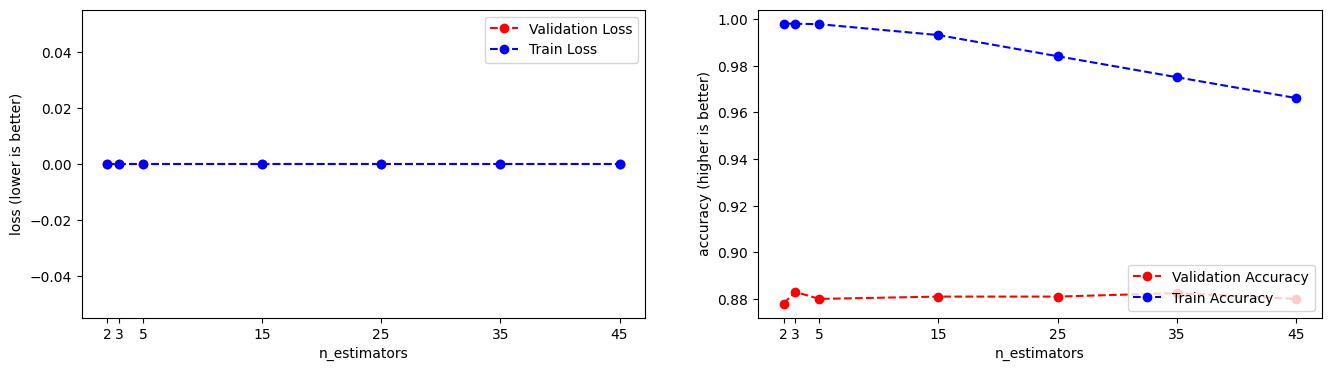

In [24]:
import matplotlib.pyplot as plt

if tune_model:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

    ax1.set_xticks(hyp_param_vals)
    ax1.set(xlabel="n_estimators", ylabel="loss (lower is better)")
    ax1.plot(hyp_param_vals, [metric[1] for metric in metrics], '--ro') # validation loss
    ax1.plot(hyp_param_vals, [metric[0] for metric in metrics], '--bo') # training loss
    ax1.legend(["Validation Loss", "Train Loss"], loc=1)

    ax2.set_xticks(hyp_param_vals)
    ax2.set(xlabel="n_estimators", ylabel="accuracy (higher is better)")
    ax2.plot(hyp_param_vals, [metric[3] for metric in metrics], '--ro') # validation accuracy
    ax2.plot(hyp_param_vals, [metric[2] for metric in metrics], '--bo') # training accuracy
    ax2.legend(["Validation Accuracy", "Train Accuracy"], loc=4)

# Testing Data

After tuning the hyperparameters, I trained a new model with the best values that I found. I used the model to predict labels for the testing dataset, which it had never seen before, and got an accuracy of 86.75%.

accuracy (on X_train): 0.8675


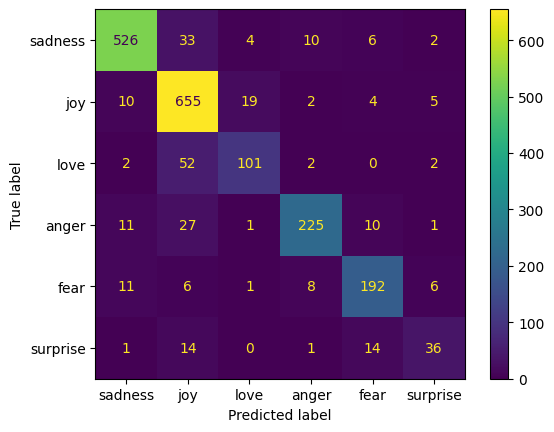

In [26]:
model = RandomForestClassifier(n_estimators=160, min_samples_split=3, n_jobs=-1)
model = model.fit(X_train, Y_train)

predictions_test = model.predict(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, predictions_test), display_labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
disp.plot()
print(f"accuracy (on X_train): {accuracy_score(Y_test, predictions_test):.4f}")